<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

In [3]:
people = fetch_lfw_people(
    min_faces_per_person=20,
    resize= 1.0
)

In [15]:
counts = np.bincount(people.target)

In [23]:
p,c = np.unique(people.target,return_counts=True)
print(dict(zip(people.target_names[p],c)))
counts
people.target

{'Alejandro Toledo': 39, 'Alvaro Uribe': 35, 'Amelie Mauresmo': 21, 'Andre Agassi': 36, 'Angelina Jolie': 20, 'Ariel Sharon': 77, 'Arnold Schwarzenegger': 42, 'Atal Bihari Vajpayee': 24, 'Bill Clinton': 29, 'Carlos Menem': 21, 'Colin Powell': 236, 'David Beckham': 31, 'Donald Rumsfeld': 121, 'George Robertson': 22, 'George W Bush': 530, 'Gerhard Schroeder': 109, 'Gloria Macapagal Arroyo': 44, 'Gray Davis': 26, 'Guillermo Coria': 30, 'Hamid Karzai': 22, 'Hans Blix': 39, 'Hugo Chavez': 71, 'Igor Ivanov': 20, 'Jack Straw': 28, 'Jacques Chirac': 52, 'Jean Chretien': 55, 'Jennifer Aniston': 21, 'Jennifer Capriati': 42, 'Jennifer Lopez': 21, 'Jeremy Greenstock': 24, 'Jiang Zemin': 20, 'John Ashcroft': 53, 'John Negroponte': 31, 'Jose Maria Aznar': 23, 'Juan Carlos Ferrero': 28, 'Junichiro Koizumi': 60, 'Kofi Annan': 32, 'Laura Bush': 41, 'Lindsay Davenport': 22, 'Lleyton Hewitt': 41, 'Luiz Inacio Lula da Silva': 48, 'Mahmoud Abbas': 29, 'Megawati Sukarnoputri': 33, 'Michael Bloomberg': 20, '

array([61, 25,  9, ..., 14, 15, 14], dtype=int64)

In [32]:
mask = np.zeros(people.target.shape,dtype=np.bool)
# 3000*1

In [41]:
np.where(people.target == 1)
# np.where returns array
# array[0] is array of index where people.target is 1
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]  = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/255.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(
    X_people,
    y_people,
    stratify = y_people,
    random_state = 0
)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.23449612403100775

In [44]:
import mglearn

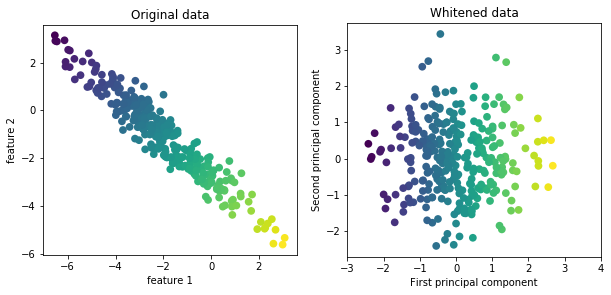

In [45]:
mglearn.plots.plot_pca_whitening()

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=100,whiten =True,random_state=0).fit(X_train)

In [49]:
X_train_PCA = pca.transform(X_train)

In [52]:
X_test_PCA = pca.transform(X_test)

In [54]:
knn.fit(X_train_PCA,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [55]:
knn.score(X_test_PCA,y_test)

0.29457364341085274

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

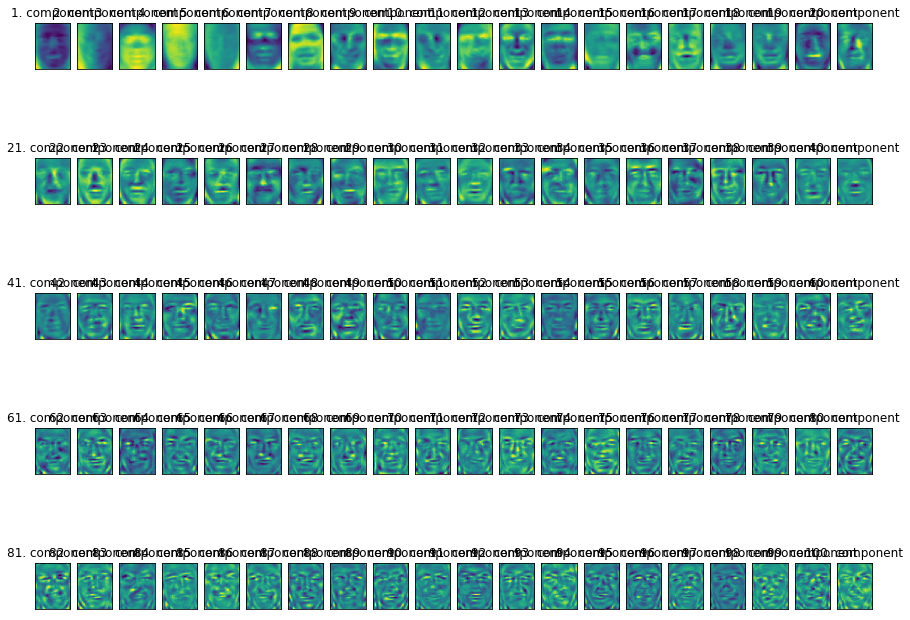

In [61]:
image_shape= people.images[0].shape
fix,axes = plt.subplots(5,20,figsize=(15,12),subplot_kw = {"xticks":(),"yticks":()})
for i ,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap="viridis")
    ax.set_title("{}. component".format((i+1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.52549 , ..., 0.19085 ],
       ...,
       [0.052288, ..., 0.597386]], dtype=float32), 
array([[0.230065, ..., 0.184314],
       ...,
       [0.396078, ..., 0.294118]], dtype=float32))
________________________________________________________pca_faces - 3.4s, 0.1min


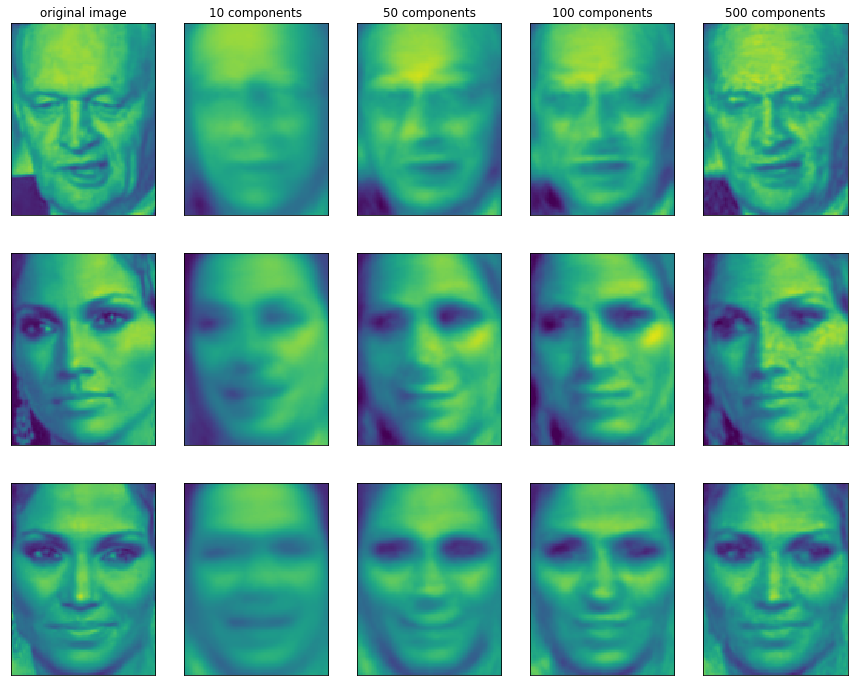

In [63]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

In [64]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15,random_state=0)
nmf.fit(X_train)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=15, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

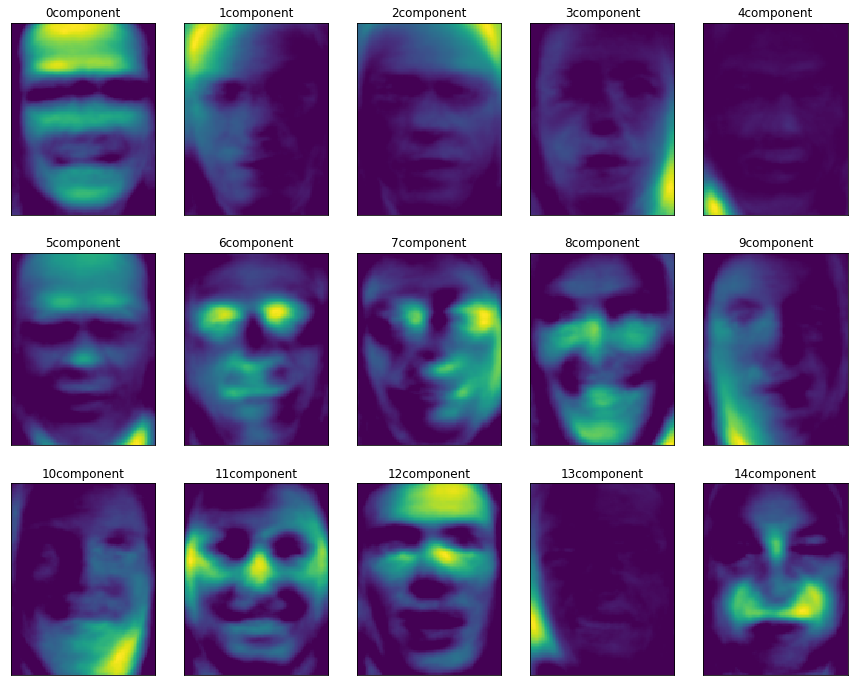

In [66]:
X_train_nmf=nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix,axes = plt.subplots(
    3,5,
    figsize=(15,12),
    subplot_kw = {"xticks":(),"yticks":()}
)
for i ,(component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}component".format(i))

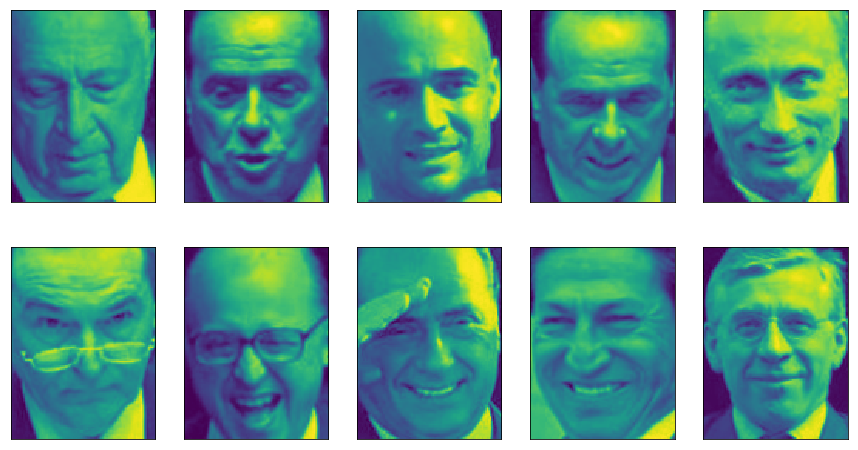

In [73]:
comp_n = 5
indices = np.argsort(X_train_nmf[:,comp_n])[::-1]
fig,axes = plt.subplots(
    2,5,
    figsize=(15,8),
    subplot_kw={"xticks":(),"yticks":()}
)
for i ,(idx,ax) in enumerate(zip(indices,axes.ravel())):
    ax.imshow(X_train[idx].reshape(image_shape))